<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2021

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 5-Q2
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  Bahman 17th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Data


In [1]:
# Set your student number
student_number = 97101489
Name = 'Amirhosein'
Last_Name = 'Javadi'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip /content/Q2.zip

Archive:  /content/Q2.zip
replace .ipynb_checkpoints/Atari_DQN-checkpoint.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Rules
- You are not allowed to use provided codes that can be found on the internet. 
- If you want to use a library which is not already imported, you must ask a question on Quera to get the permission of using that.
- Do not hesitate to ask questions on Quera, if you have any.
- This assignment is due Bahman 17th 23:59:59. you can use up to 1 grace day for this assignment and the hard deadline is Bahman 18th 23:59:59.

# Mastering Atari Games using Deep Reinforcement Learning

In this assignment, you will learn how to implement a Deep-Q-Network (DQN), and to demonstrate that, you may implement and train a DQN and run it on an Atari game in **OpenAI-Gym** environment. Additionally, you may also want to refer to the [original paper](https://arxiv.org/pdf/1312.5602.pdf) regarding the usage of DQN in Atari networks.

For this assignment, you will have two options to choose from:
* **Breakout**: A famous Atari game that is a staple for learning deep q networks. This game is already available in the gym library environment. By solving this completely you will receive 100/100 points.
* **Shoot-N-Dodge**: This is another Atari game that has been developed for the sole reason of this particular assignment. The game involves a spaceship with guns and a bunch of meteors coming your way! For those of you who are up for the challenge, you may run your DQN on this game and receive **extra points**. By implementing and training a network capable of solving this custom game you will receive 150/100 points with 50 points being extra.

In the following, you can read the description of the games and how to start running it. We advise using either `Google-Colab` or `Kaggle` for training the model as DQN models usually take a lot of time to train.

Before we start, make sure to install and import the following packages:

In [4]:
!pip install gym
!pip install opencv-python
!pip install pillow
!pip install numpy
!pip install matplotlib
!pip install torch
!pip install psutil
!pip install array2gif

In [5]:
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

%matplotlib inline

In [6]:
# Deep Learning requirements
### make sure to use gpu for this assignment
import torch
import torch.nn as nn
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

As alluded, we will use the `gym` framework to simulate our game.

## Option 1: Breakout (60 points)

The famous game [Breakout](https://en.wikipedia.org/wiki/Breakout_(video_game)) involves a paddle and bricks. It is one of the games in which DQNs have proven to work very good on. 

<img src="figs/nerd.png" width=400 height=400 />

In [7]:
# Run this block if you intend to implement the breakout option

ENV_NAME = "BreakoutNoFrameskip-v4"

## Option 2: Shoot-N-Dodge (60+30 points)

In this game you control a space ship that shoots bullets. At each frame, you may either move up, down, or stay still. Every once in a while some meteors colored in red show up at random at the other end of the screen and you should avoid or destroy them. If either one of these meteors hits you, you will die!

To destroy the meteors, you have to shoot them three times and each time you shoot them their color changes until they disappear. They change color from red to orange to yellow and then they are gone.

<img src="figs/shoot-n-dodge.jpg" width=430 height=420 />

In [9]:
# Run this block if you intend to implement the ShootNDodge option

ENV_NAME = 'shootndodge-v0'


### Installing the game


#### Breakout

In order to install Breakout on your environment, please execute the following code. 

In [8]:

!pip install stable-baselines3[extra] pyvirtualdisplay gym[atari] pyglet 
!apt-get install python-opengl -y
!pip install atari-py
!apt-get install unrar

!wget http://www.atarimania.com/roms/Roms.rar 
!unrar x Roms.rar 
!unzip ROMS.zip
!python -m atari_py.import_roms ROMS

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-

#### Shoot N Dodge
The game is provided as a python package and can be run as an **OpenAI-Gym** environment. To do so, you will have to go to the setup folder and install the package on your python virtual environment.

In [9]:
# NOTE:
# .... You should be at the root directory of the repository in order to run this

!pip install -e gym-shootndodge/.
# !pip install -e /content/drive/MyDrive/AI/5/Q2/gym-shootndodge/.
# ------------------------------------------------------------------------------------

# Install from git address (useful for Google Colab)

# !pip install -e git+https://github.com/sut-ai/F2021-P5/tree/master/practical/questions/gym-shootndodge/.

Obtaining file:///content/gym-shootndodge
  Attempting uninstall: gym-shootndodge
    Found existing installation: gym-shootndodge 1.2
    Can't uninstall 'gym-shootndodge'. No files were found to uninstall.
  Running setup.py develop for gym-shootndodge


## Seeing the game

Without further ado, we shall start see how your game works. To do so, run the code below:

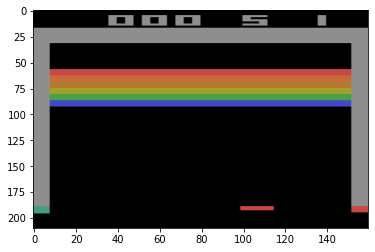

In [13]:
env = gym.make(ENV_NAME)
obs = env.reset()
plt.imshow(env.render(mode='rgb_array'), aspect='auto')
plt.show()

Run the game in multiple frames to see what it looks like:

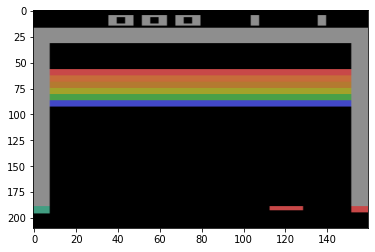

In [14]:
env = gym.make(ENV_NAME)
env.seed(2022)
obs = env.reset()

a = env.action_space.sample()
for i in range(5000):
    if (i + 1) % 40 == 0:
        a = env.action_space.sample()
    observation, reward, done, info = env.step(a)
    if (i + 1) % 5 == 0:
        clear_output(True)
        screen = env.render(mode='rgb_array')
        plt.imshow(screen, aspect='auto')
        plt.show()
    if done:
        break

(210, 160, 3)
(210, 160, 3)
(84, 84, 1)


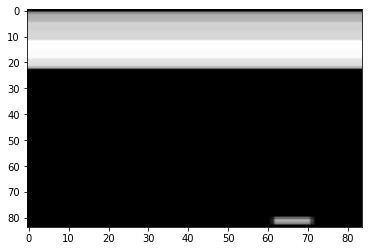

In [15]:
# extra
print(env.observation_space.shape)
print(np.shape(obs))
import cv2

img = screen[55:195,10:150] # cropping
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Gray scale
img = cv2.resize(img, (84, 84), interpolation = cv2.INTER_AREA)
img = np.float32(img)/255
plt.imshow(img*255, cmap='gray', aspect='auto')
img = np.expand_dims(img, axis=2)
print(np.shape(img))

def observation(self, img):
  """what happens to each observation"""
  img = img[55:195,10:150] # cropping
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Gray scale
  img = cv2.resize(img, (self.img_size[0], self.img_size[1]), interpolation = cv2.INTER_AREA) # resizing
  img = np.float32(img)/255
  img = np.expand_dims(img, axis=2)
        # Here's what you need to do:
        #  * crop image, remove irrelevant parts
        #  * resize image to self.img_size
        #     (use imresize from any library you want,
        #      e.g. opencv, skimage, PIL, keras)
        #  * cast image to grayscale (in case of breakout)
        #  * convert image pixels to (0,1) range, float32 type

        # TODO: complete observation descaling
  processed_img = img
  return processed_img

def observation(self, img):
      """what happens to each observation"""
      img = img[55:195,10:150] # cropping
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Gray scale
      img = cv2.resize(img, (self.img_size[0], self.img_size[1]), interpolation = cv2.INTER_AREA) # resizing
      img = np.float32(img)/255
      img = np.expand_dims(img, axis=2)
      processed_img = img
      return processed_img

Feel free to hard code any policies before moving on to the next steps.

## Environment Wrappers

In this section, we will do some preprocessings on the environment. Basically our work consists of wrapping our environment around three wrappers. You should implement each of these wrappers in the `src/wrappers.py` file provided to you in the assignment folder. 
* Reducing image input size: The Atari game given as input has high resolution which is definitely not needed for the model and it can learn efficiently without all of the additional data. These additional pixels create overhead. We can thus save a lot of time by preprocessing game image, including:
    - Resizing to a smaller shape, (84 x 84 recommended for the Breakout and 50 x 50 recommended for ShootNDodge)
    - Converting to grayscale (Not recommended for ShootNDodge)
    - Cropping irrelevant image parts (top, bottom and edges)
    - Also please keep one dimension for channel even if the image is grayscale so that final shape would be (H x W x C)
* Reward clipping: There might be the case that many of the RL problems have unstable rewards. In case the rewards are not continuous with respect to the state space, then the local optimization methods used for learning the network will fall short. To address this issue we create a wrapper around our original environment - Note that this is not a necessity and in case you feel comfortable with the rewards given in the original environment, then your wrapper should simply return the previous values as if nothing has heppened! Feel free to accumulate more knowledge about reward clipping where we reduce the range of the rewards to [-1, 1]. In case you observe increasing gradient norms in the learning process, then it would be good to consider this method.
* Remove Blinking: Since we resize the image, we might come accross blinking whereas in one frame a certain thing is visible, but at the split-frame afterward, it fades and then returns again. To remove this issue we introduce a `MaxAndSkipEnv` in which we skip one frame and each frame's intensity will be equal to the maximum of the previous frame and itself. A preliminary code is implemented in the `wrappers.py` file.
* Episodic life: In case of *Breakout* losing takes 5 lives. To increase the chance of the model learning, we may end the game whenever one single life is lost.
* Starting the game: In case of *Breakout* one should take a particular action to start the game. For example, they might need to press the `space` key in order for the game to start rolling. A wrapper is implemented to forcefully enter the game start action in the beginning. Indeed, in case this wrapper is not implemented, the agent can learn to take that action to gain higher reward; however, this will make the training time even longer.

After implementing or checking the wrappers in `src/wrappers.py` we can culminate all of the wrappers in the following class. A baseline is implemented for this wrapper but feel free to change it at will.

In [10]:
from src.wrappers import PreprocessAtariObs, MaxAndSkipEnv, EpisodicLifeEnv, FireResetEnv, ClipRewardEnv, PreprocessAtariObs

# def PrimaryAtariWrap(env, game, clip_rewards=True):
def PrimaryAtariWrap(env, clip_rewards=True): 
    name = env.unwrapped.spec.id
    # print(name)
    # This wrapper holds the same action for <skip> frames and outputs
    # the maximal pixel value of 2 last frames (to handle blinking
    # in some envs)
    env = MaxAndSkipEnv(env, skip=4)

    # This wrapper sends done=True when each life is lost
    # (not all the 5 lives that are givern by the game rules).
    # It should make easier for the agent to understand that losing is bad.
    if name == "BreakoutNoFrameskip-v4":
        EpisodicLifeEnv(env)

    # This wrapper laucnhes the ball when an episode starts.
    # Without it the agent has to learn this action, too.
    # Actually it can but learning would take longer.
    if name == "BreakoutNoFrameskip-v4":
        env = FireResetEnv(env)

    # This wrapper squeezes the rewards to range [-1, 1]
    if clip_rewards:
        env = ClipRewardEnv(env)

    # This wrapper is yours :)
    env = PreprocessAtariObs(env, True)
    # print(env)
    return env


## Frame Buffer

It is reasonable to assume that only one frame of the game does not hold information about the game dynamics. Hence, each observation should in fact contain multiple frames. There is a rule of thumb in these Atari games to consider buffering the last 4 frames of the game. In that case, each observation will be of form (H x W x C*F) where F represents the number of frames saved.

To implement this, you may check the `src/framebuffer.py` file or change/implement your own frame buffer. With all of that done, we can run the following function to have an environment that has rich observations and reasonable rewards that provide the features necessary to train our DQN model.


In [11]:
from src.framebuffer import FrameBuffer

def make_env(clip_rewards=False, seed=None):
    env = gym.make(ENV_NAME)  # create raw env
    if seed is not None:
        env.seed(seed)
    env = PrimaryAtariWrap(env, clip_rewards)
    env = FrameBuffer(env, n_frames=4)
    return env

env = make_env()
env.reset()
n_actions = env.action_space.n
print(n_actions)
state_shape = env.observation_space.shape
print(state_shape)

obs = env.observation_space
print(obs)

4
(84, 84, 4)
Box(0.0, 1.0, (84, 84, 4), float32)


### The DQN architecture

We now need to build a neural network that can map images to state q-values. This network will be called on every agent's step so it better not be resnet-152 unless you have an array of GPUs. Instead, you can use strided convolutions with a small number of features to save time and memory.

You can build any architecture you want, but for reference, here's something that will more or less work:

<img src="figs/dqn_arch.png" width=400 height=400/>

**IMPORTANT NOTE!** The pytorch library takes inputs as tensors of size `[batch_size, channel_size, h, w]`; however, for visualization reasons, we have used numpy arrays of size `[h, w, channel_size]` up until now! Make sure to do the needed transformation before giving it convolutional layers.

In [12]:
class DQNAgent(nn.Module):
    def __init__(self, env, epsilon=0):

        super().__init__()
        self.epsilon = epsilon
        self.state_shape = (-1, 
                            env.observation_space.shape[2],
                            env.observation_space.shape[0],
                            env.observation_space.shape[1])
        self.n_actions = env.action_space.n

        # TODO
        # Define your network body here. Please make sure agent is fully contained here
        # nn.Flatten() can be useful
        #<YOUR CODE>
        #######################################################
        self.layers = nn.Sequential(
            nn.Conv2d(4, 16, 3, stride=2),   # B 16  41  41  
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2),  # B 32  20  20  
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2),  # B 64  9  9
            nn.ReLU(),
        )                
        self.fc = nn.Sequential(
            nn.Flatten(),                    # B 2048
            nn.Linear(9*9*64, 256),         # B 256
            nn.ReLU(),
            nn.Linear(256, self.n_actions)
        )
        #######################################################

    def forward(self, state_t):
        """
        takes agent's observation (tensor), returns qvalues (tensor)
        :param state_t: a batch of 4-frame buffers, shape = [batch_size, h, w, 4 * c]
        """
        # TODO
        #######################################################
        state_t = torch.reshape(state_t, self.state_shape)#.to(device)
        state_t = self.layers(state_t)#.to(device)
        qvalues = self.fc(state_t)#.to(device)
        #######################################################
        # Use your network to compute qvalues for given state
        # qvalues = None

        assert qvalues.requires_grad, "qvalues must be a torch tensor with grad"
        assert len(qvalues.shape) == 2 and qvalues.shape[0] == state_t.shape[0] and qvalues.shape[1] == self.n_actions

        return qvalues

    def get_qvalues(self, states):
        """
        like forward, but works on numpy arrays, not tensors
        """
        model_device = next(self.parameters()).device
        states = torch.tensor(states, device=model_device, dtype=torch.float)
        qvalues = self.forward(states)
        return qvalues.data.cpu().numpy()
        

    def sample_actions(self, qvalues, epsilon):
        """pick actions given qvalues. Uses epsilon-greedy exploration strategy. """
        epsilon = self.epsilon
        batch_size, n_actions = qvalues.shape

        random_actions = np.random.choice(n_actions, size=batch_size)
        best_actions = qvalues.argmax(axis=-1)

        should_explore = np.random.choice(
            [0, 1], batch_size, p=[1-epsilon, epsilon])
        return np.where(should_explore, random_actions, best_actions)

Run the agent to see if it encounters any errors:

In [13]:
def evaluate(env, agent, n_games=1, greedy=False, t_max=10000, visualize=False):
    """ Plays n_games full games. If greedy, picks actions as argmax(qvalues). Returns mean reward. """
    rewards = []
    for g in range(n_games):
        s = env.reset()
        total_reward = 0
        for t in range(t_max):
            qvalues = agent.get_qvalues(torch.tensor([s], dtype=torch.float32))
            a = agent.sample_actions(qvalues, epsilon=greedy)[0]
            next_s, r, done, _ = env.step(a)
            total_reward += r
            s = next_s
            if done:
                break
        print(f'reward of game {g+1} is {total_reward}')
        rewards.append(total_reward)
    # TODO: your code here!
    return np.mean(rewards)

In [14]:
# Run the code below to see if the network can run a policy
agent = DQNAgent(env)
evaluate(env, agent, n_games=15, t_max=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


reward of game 1 is 0.0
reward of game 2 is 0.0
reward of game 3 is 0.0
reward of game 4 is 0.0
reward of game 5 is 0.0
reward of game 6 is 0.0
reward of game 7 is 0.0
reward of game 8 is 0.0
reward of game 9 is 0.0
reward of game 10 is 0.0
reward of game 11 is 0.0
reward of game 12 is 0.0
reward of game 13 is 0.0
reward of game 14 is 0.0
reward of game 15 is 0.0


0.0

### Experience Replay

The common practice in DQN literature consists of using an experience replay buffer in which tuples of form $(s, a, r, s')$ are stored. In each epoch, a random batch of this buffer will be given to the network for training. 

In this section, we will implement this buffer; the interface is fairly simple:
* `exp_replay.add(obs, act, rw, next_obs, done)` - saves (s,a,r,s',done) tuple into the buffer
* `exp_replay.sample(batch_size)` - returns observations, actions, rewards, next_observations and is_done for batch_size random samples.
* `len(exp_replay)` - returns number of elements stored in replay buffer.

In [15]:
# This code is shamelessly stolen from
# https://github.com/openai/baselines/blob/master/baselines/deepq/replay_buffer.py
import numpy as np
import random


class ReplayBuffer:
    def __init__(self, size):
        """Create Replay buffer.
        Parameters
        ----------
        size: int
            Max number of transitions to store in the buffer. When the buffer
            overflows the old memories are dropped.
        """
        self._storage = []
        self._maxsize = size
        self._next_idx = 0

    def __len__(self):
        return len(self._storage)

    def add(self, obs_t, action, reward, obs_tp1, done):
        # fill the data cyclically, if the list is not yet complete append it
        data = (obs_t, action, reward, obs_tp1, done)

        if self._next_idx >= len(self._storage):
            self._storage.append(data)
        else:
            self._storage[self._next_idx] = data
        self._next_idx = (self._next_idx + 1) % self._maxsize

    def _encode_sample(self, idxes):
        obses_t, actions, rewards, obses_tp1, dones = [], [], [], [], []
        for i in idxes:
            data = self._storage[i]
            obs_t, action, reward, obs_tp1, done = data
            obses_t.append(np.array(obs_t, copy=False))
            actions.append(np.array(action, copy=False))
            rewards.append(reward)
            obses_tp1.append(np.array(obs_tp1, copy=False))
            dones.append(done)
        return (
            np.array(obses_t),
            np.array(actions),
            np.array(rewards),
            np.array(obses_tp1),
            np.array(dones)
        )

    def sample(self, batch_size):
        """Sample a batch of experiences.
        Parameters
        ----------
        batch_size: int
            How many transitions to sample.
        Returns
        -------
        obs_batch: np.array
            batch of observations
        act_batch: np.array
            batch of actions executed given obs_batch
        rew_batch: np.array
            rewards received as results of executing act_batch
        next_obs_batch: np.array
            next set of observations seen after executing act_batch
        done_mask: np.array
            done_mask[i] = 1 if executing act_batch[i] resulted in
            the end of an episode and 0 otherwise.
        """
        idxes = [
            random.randint(0, len(self._storage) - 1)
            for _ in range(batch_size)
        ]
        return self._encode_sample(idxes)

Implement the function `play_and_record` in which we play the game for a number of steps and add the steps into an experience replay buffer.

In [16]:
def play_and_record(initial_state, agent, env, exp_replay, n_steps=1):
    """
    Play the game for exactly n steps, record every (s,a,r,s', done) to replay buffer. 
    Whenever game ends, add record with done=True and reset the game.
    It is guaranteed that env has done=False when passed to this function.

    PLEASE DO NOT RESET ENV UNLESS IT IS "DONE"

    :returns: return sum of rewards over time and the state in which the env stays
    """
    s = initial_state
    sum_rewards = 0

    # Play the game for n_steps as per instructions above
    for i in range(n_steps):
        # TODO: implement this section
        ##################################################################
        qvalues = agent.get_qvalues(torch.tensor([s], dtype=torch.float32))
        a = agent.sample_actions(qvalues, epsilon=1)[0]
        next_s, r, done, _ = env.step(a)  
        exp_replay.add(s, a, r, next_s, False)
        if done == True:
          s = env.reset()
        else:
          s = next_s
        sum_rewards += r
        ##################################################################
    return sum_rewards, s

Run some simple sanity checks.

In [17]:
exp_replay = ReplayBuffer(10)

for _ in range(30):
    exp_replay.add(env.reset(), env.action_space.sample(),
                   1.0, env.reset(), done=False)

obs_batch, act_batch, reward_batch, next_obs_batch, is_done_batch = exp_replay.sample(
    5)

assert len(exp_replay) == 10, "experience replay size should be 10 because that's what maximum capacity is"

exp_replay = ReplayBuffer(2000)

state = env.reset()
play_and_record(state, agent, env, exp_replay, n_steps=1000)

# if you're using your own experience replay buffer, some of those tests may need correction.
# just make sure you know what your code does
assert len(exp_replay) == 1000, "play_and_record should have added exactly 1000 steps, "\
                                 "but instead added %i" % len(exp_replay)
is_dones = list(zip(*exp_replay._storage))[-1]

for _ in range(100):
    obs_batch, act_batch, reward_batch, next_obs_batch, is_done_batch = exp_replay.sample(
        10)
    assert obs_batch.shape == next_obs_batch.shape == (10,) + state_shape
    assert act_batch.shape == (
        10,), "actions batch should have shape (10,) but is instead %s" % str(act_batch.shape)
    assert reward_batch.shape == (
        10,), "rewards batch should have shape (10,) but is instead %s" % str(reward_batch.shape)
    assert is_done_batch.shape == (
        10,), "is_done batch should have shape (10,) but is instead %s" % str(is_done_batch.shape)
    assert [int(i) in (0, 1)
            for i in is_dones], "is_done should be strictly True or False"
    assert [
        0 <= a < n_actions for a in act_batch], "actions should be within [0, n_actions)"

print("Well done!")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Well done!


### Target Networks

DQN is basically a policy iteration method in which we both approximate the $Q$ values and improve them as we go. This might cause any errors in estimating to propagate and create unwanted difficulties. To address this issue we use **Target Networks**. Recall the main Q-Learning framework:

$$Q(s, a; \Theta) := Q(s, a; \Theta) + \eta \big(R(s, a) + \gamma \times \max_{a'} \hat{Q}(s, a'; \Theta')  - Q(s, a; \Theta)\big)$$

In this framework we approximate the $\hat{Q}(s, a'; \Theta')$ values using a network parameterized by $\Theta'$ and this is the actual target network. After certain frequencies we load the current network into the target network.

In [18]:
target_network = DQNAgent(env, epsilon=0.5).to(device)
# This is how you can load weights from agent into target network
target_network.load_state_dict(agent.state_dict())

<All keys matched successfully>

## Q-Learning
Here we will finally implement the Q-Learning procedure. Here's the process:

Compute Q-learning TD error:

$$ L = { 1 \over N} \sum_i [ Q_{\theta}(s,a) - Q_{reference}(s,a) ] ^2 $$

With Q-reference defined as

$$ Q_{reference}(s,a) = r(s,a) + \gamma \cdot max_{a'} Q_{target}(s', a') $$

Where
* $Q_{target}(s',a')$ denotes q-value of next state and next action predicted by __target_network__
* $s, a, r, s'$ are current state, action, reward and next state respectively
* $\gamma$ is a discount factor defined two cells above.


__Note 1:__ there's an example input below. Feel free to experiment with it before you write the function.

__Note 2:__ compute_td_loss is a source of 99% of bugs in this homework. If reward doesn't improve, it often helps to go through it line by line [with a rubber duck](https://rubberduckdebugging.com/).

In [19]:
def compute_td_loss(states, actions, rewards, next_states, is_done,
                    agent, target_network,
                    gamma=0.99,
                    check_shapes=False,
                    device=device):
    """ Compute td loss using torch operations only. Use the formulae above. """
    states = torch.tensor(states, device=device, dtype=torch.float)    # shape: [batch_size, *state_shape]
    
    # for some torch reason should not make actions a tensor
    actions = torch.tensor(actions, device=device, dtype=torch.long)    # shape: [batch_size]
    rewards = torch.tensor(rewards, device=device, dtype=torch.float)  # shape: [batch_size]
    # shape: [batch_size, *state_shape]
    next_states = torch.tensor(next_states, device=device, dtype=torch.float)
    is_done = torch.tensor(is_done.astype('float32'),device=device,dtype=torch.float)  # shape: [batch_size]
    is_not_done = 1 - is_done
    agent = agent.to(device)
    # get q-values for all actions in current states
    predicted_qvalues = agent(states)

    # compute q-values for all actions in next states
    predicted_next_qvalues = target_network(next_states)
    
    # select q-values for chosen actions
    predicted_qvalues_for_actions = predicted_qvalues[range(
        len(actions)), actions]

    # compute V*(next_states) using predicted next q-values
    # TODO
    ##################################################################
    next_state_values = predicted_next_qvalues.max(axis=-1)[0] 
    #<YOUR CODE>
    ##################################################################

    assert next_state_values.dim(
    ) == 1 and next_state_values.shape[0] == states.shape[0], "must predict one value per state"

    # compute "target q-values" for loss - it's what's inside square parentheses in the above formula.
    # at the last state use the simplified formula: Q(s,a) = r(s,a) since s' doesn't exist
    # you can multiply next state values by is_not_done to achieve this.
    # TODO
    ##################################################################
    target_qvalues_for_actions = rewards + gamma * next_state_values * (1-is_done)
    # target_qvalues_for_actions = torch.where(is_done , rewards, target_qvalues_for_actions)
     #<YOUR CODE>
    ##################################################################
    # mean squared error loss to minimize
    loss = torch.mean((predicted_qvalues_for_actions -
                       target_qvalues_for_actions.detach()) ** 2)

    if check_shapes:
        assert predicted_next_qvalues.data.dim(
        ) == 2, "make sure you predicted q-values for all actions in next state"
        assert next_state_values.data.dim(
        ) == 1, "make sure you computed V(s') as maximum over just the actions axis and not all axes"
        assert target_qvalues_for_actions.data.dim(
        ) == 1, "there's something wrong with target q-values, they must be a vector"

    return loss

Sanity checks!

In [20]:
obs_batch, act_batch, reward_batch, next_obs_batch, is_done_batch = exp_replay.sample(10)

loss = compute_td_loss(obs_batch, act_batch, reward_batch, next_obs_batch, is_done_batch,
                       agent, target_network,
                       gamma=0.99, check_shapes=True, device=device)
loss.backward()

assert loss.requires_grad and tuple(loss.data.size()) == (
    ), "you must return scalar loss - mean over batch"
assert np.any(next(agent.parameters()).grad.data.cpu().numpy() !=
              0), "loss must be differentiable w.r.t. network weights"
assert np.all(next(target_network.parameters()).grad is None), "target network should not have grads"

## Main Learning Loop

In [21]:
seed = 13790110 #<your favourite random seed>
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [22]:
env = make_env(seed)
state_shape = env.observation_space.shape
n_actions = env.action_space.n
state = env.reset()
print(state_shape, n_actions)

# agent = DQNAgent(state_shape, n_actions, epsilon=1).to(device)
agent = DQNAgent(env, epsilon=1).to(device)
#target_network = DQNAgent(state_shape, n_actions).to(device)
target_network = DQNAgent(env, epsilon=1).to(device)
target_network.load_state_dict(agent.state_dict())

(84, 84, 4) 4


<All keys matched successfully>

The following are the hyperparameters for the learning process. Feel free to change them as you will; although some default values are assigned to them currently.

**IMPORTANT NOTE!** Since the training takes time, you may (and should!) save your model with some frequency.

In [23]:
exp_replay = ReplayBuffer(70000)
timesteps_per_epoch = 1
batch_size = 64
total_steps = 3 * 10**6
decay_steps = 10**6

opt = torch.optim.Adam(agent.parameters(), lr=1e-5)

init_epsilon = 1 #0.30096  #0.42945  0.49933  0.622 # 1
final_epsilon = 0.1

loss_freq = 50
refresh_target_network_freq = 5000
eval_freq = 5000

max_grad_norm = 50

n_lives = 5

save_freq = 10000

In [37]:
# DO NOT RERUN THIS TO MAINTAIN THE HISTORY!
import pickle

mean_rw_history = []
td_loss_history = []
grad_norm_history = []
initial_state_v_history = []
step = 0

with open('/content/drive/MyDrive/Colab Notebooks/Save_Model_Hw5/mean_rw_history', "rb") as fp:
  mean_rw_history = pickle.load(fp)
with open('/content/drive/MyDrive/Colab Notebooks/Save_Model_Hw5/td_loss_history', "rb") as fp:
  td_loss_history = pickle.load(fp)
with open('/content/drive/MyDrive/Colab Notebooks/Save_Model_Hw5/grad_norm_history', "rb") as fp:
  grad_norm_history = pickle.load(fp)
with open('/content/drive/MyDrive/Colab Notebooks/Save_Model_Hw5/initial_state_v_history', "rb") as fp:
  initial_state_v_history = pickle.load(fp)

agent = torch.load('/content/drive/MyDrive/Colab Notebooks/Save_Model_Hw5/temporary_saved_agent.pth')

buffer size = 1, epsilon = 0.30096


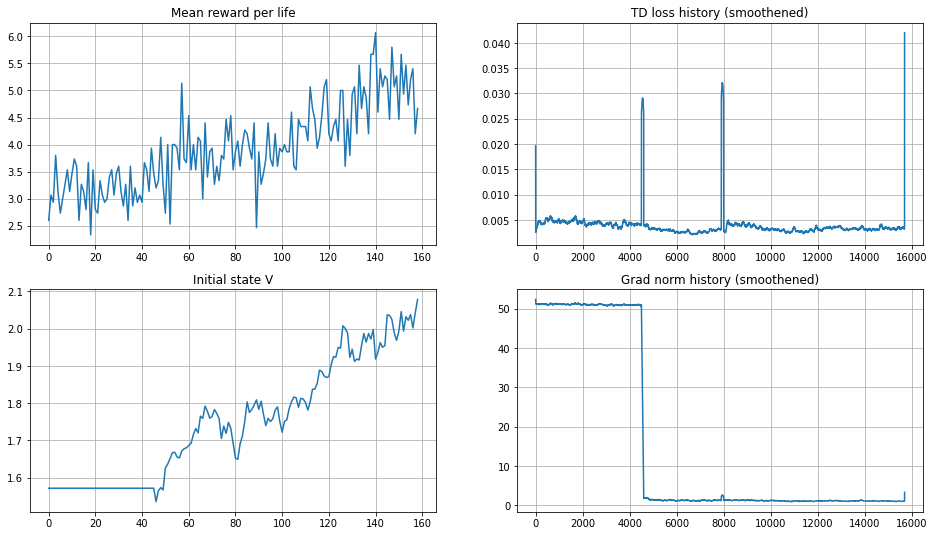

  0%|          | 316/3000001 [01:55<303:45:11,  2.74it/s]


KeyboardInterrupt: ignored

In [38]:
import utils
from tqdm import trange 

state = env.reset()
for step in trange(step, total_steps + 1):
    if not utils.is_enough_ram():
        print('less that 100 Mb RAM available, freezing')
        print('make sure everythin is ok and make KeyboardInterrupt to continue')
        try:
            while True:
                pass
        except KeyboardInterrupt:
            pass

    agent.epsilon = utils.linear_decay(init_epsilon, final_epsilon, step, decay_steps)

    # play
    _, state = play_and_record(state, agent, env, exp_replay, timesteps_per_epoch)

    # train
    ##################################################################
    # TODO: sample batch_size of data from experience replay>
    sampleFromExperienceReplay = exp_replay.sample(batch_size)
    current_states, actions, rewards, next_state, is_done_s = sampleFromExperienceReplay
    opt.zero_grad()
    loss = compute_td_loss(current_states, actions, rewards, next_state, is_done_s,
                           agent, target_network)
    # TODO: compute TD loss
    ##################################################################
    loss.backward()
    grad_norm = nn.utils.clip_grad_norm_(agent.parameters(), max_grad_norm)
    opt.step()
    opt.zero_grad()
    
    if (step + 1) % save_freq == 0:
        torch.save(agent, 'saved-models/temporary_saved_agent.pth')
        torch.save(agent, '/content/drive/MyDrive/Colab Notebooks/Save_Model_Hw5/temporary_saved_agent.pth')
        with open('saved-models/mean_rw_history', "wb") as fp:
          pickle.dump(mean_rw_history, fp)
        with open('/content/drive/MyDrive/Colab Notebooks/Save_Model_Hw5/mean_rw_history', "wb") as fp:
          pickle.dump(mean_rw_history, fp)
        with open('saved-models/td_loss_history', "wb") as fp:
          pickle.dump(td_loss_history, fp)
        with open('/content/drive/MyDrive/Colab Notebooks/Save_Model_Hw5/td_loss_history', "wb") as fp:
          pickle.dump(td_loss_history, fp)
        with open('saved-models/grad_norm_history', "wb") as fp:
          pickle.dump(grad_norm_history, fp)
        with open('/content/drive/MyDrive/Colab Notebooks/Save_Model_Hw5/grad_norm_history', "wb") as fp:
          pickle.dump(grad_norm_history, fp)
        with open('saved-models/initial_state_v_history', "wb") as fp:
          pickle.dump(initial_state_v_history, fp)
        with open('/content/drive/MyDrive/Colab Notebooks/Save_Model_Hw5/initial_state_v_history', "wb") as fp:
          pickle.dump(initial_state_v_history, fp)
        
    if step % loss_freq == 0:
        td_loss_history.append(loss.data.cpu().item())
        grad_norm_history.append(grad_norm)

    if step % refresh_target_network_freq == 0:
        # Load agent weights into target_network
        # TODO
        #<YOUR CODE>
        ##################################################################
        target_network.load_state_dict(agent.state_dict())
        ##################################################################

    if step % eval_freq == 0:
        mean_rw_history.append(evaluate(
            make_env(clip_rewards=True, seed=step), agent, n_games=3 * n_lives, greedy=True)
        )
        initial_state_q_values = agent.get_qvalues(
            [make_env(seed=step).reset()]
        )
        initial_state_v_history.append(np.max(initial_state_q_values))

        clear_output(True)
        print("buffer size = %i, epsilon = %.5f" %
              (len(exp_replay), agent.epsilon))

        plt.figure(figsize=[16, 9])

        plt.subplot(2, 2, 1)
        plt.title("Mean reward per life")
        plt.plot(mean_rw_history)
        plt.grid()

        assert not np.isnan(td_loss_history[-1])
        plt.subplot(2, 2, 2)
        plt.title("TD loss history (smoothened)")
        plt.plot(utils.smoothen(td_loss_history))
        plt.grid()

        plt.subplot(2, 2, 3)
        plt.title("Initial state V")
        plt.plot(initial_state_v_history)
        plt.grid()

        plt.subplot(2, 2, 4)
        plt.title("Grad norm history (smoothened)")
        plt.plot(utils.smoothen(grad_norm_history))
        plt.grid()

        plt.show()

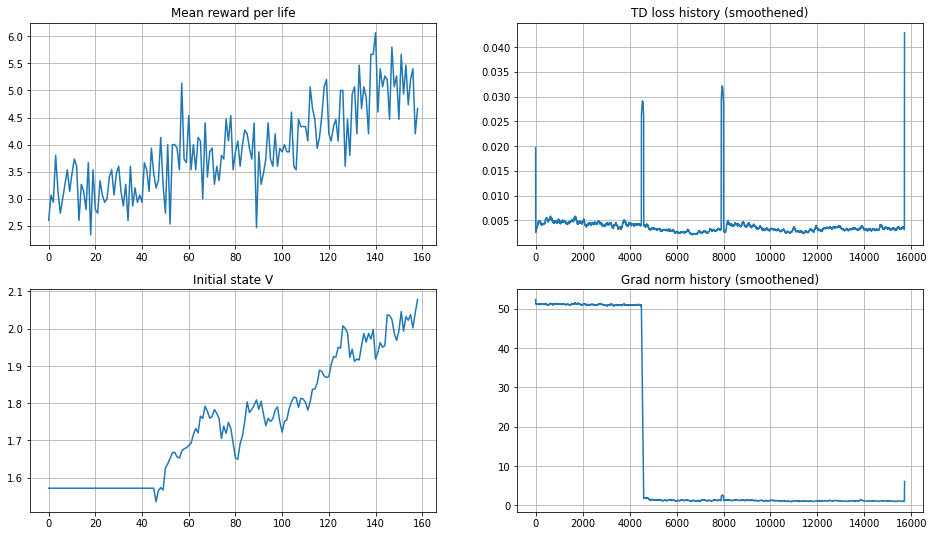

In [39]:
import utils
from tqdm import trange 

plt.figure(figsize=[16, 9])

plt.subplot(2, 2, 1)
plt.title("Mean reward per life")
plt.plot(mean_rw_history)
plt.grid()

assert not np.isnan(td_loss_history[-1])
plt.subplot(2, 2, 2)
plt.title("TD loss history (smoothened)")
plt.plot(utils.smoothen(td_loss_history))
plt.grid()

plt.subplot(2, 2, 3)
plt.title("Initial state V")
plt.plot(initial_state_v_history)
plt.grid()

plt.subplot(2, 2, 4)
plt.title("Grad norm history (smoothened)")
plt.plot(utils.smoothen(grad_norm_history))
plt.grid()

plt.show()

## How to interpret plots:

This aint no supervised learning so don't expect anything to improve monotonously. 
* **TD loss** is the MSE between agent's current Q-values and target Q-values. It may slowly increase or decrease, it's ok. The "not ok" behavior includes going NaN or stayng at exactly zero before agent has perfect performance.
* **grad norm** just shows the intensivity of training. Not ok is growing to values of about 100 (or maybe even 50) though it depends on network architecture.
* **mean reward** is the expected sum of r(s,a) agent gets over the full game session. It will oscillate, but on average it should get higher over time (after a few thousand iterations...). 
 * In basic q-learning implementation it takes about 40k steps to "warm up" agent before it starts to get better.
* **Initial state V** is the expected discounted reward for episode in the oppinion of the agent. It should behave more smoothly than **mean reward**. It should get higher over time but sometimes can experience drawdowns because of the agaent's overestimates.
* **buffer size** - this one is simple. It should go up and cap at max size.
* **epsilon** - agent's willingness to explore. If you see that agent's already at 0.01 epsilon before it's average reward is above 0 - it means you need to increase epsilon. Set it back to some 0.2 - 0.5 and decrease the pace at which it goes down.
* Smoothing of plots is done with a gaussian kernel

At first your agent will lose quickly. Then it will learn to suck less and at least hit the ball a few times before it loses. Finally it will learn to actually score points.

**Training will take time.** A lot of it actually. Probably you will not see any improvment during first **150k** time steps (note that by default in this notebook agent is evaluated every 5000 time steps).

## See how the model works and Assignment Submission

To submit the assignment, you can submit a zip file containing the filled up files and notebook. You should make sure to have the following items checked:
* Each of the blocks provided should run without error.
* Run the training and save your model in `saved-models/<STD_ID>_DQN_<ENV_NAME>.pth` format and upload it alongside the assignment.
* The history of your plots **from the first epoch until the end**. 
* You should also save your output as a gif `<STD_ID>_DQN_<ENV_NAME>.gif` and upload it alongside your files. This gif file contains the performance of your model during a complete round of the chosen game.

In [ ]:
# Note that you can change the arguments and parameteres of these following functions as you want,
# but your functions must work in the described procedure.

from array2gif import write_gif

def load_model(PATH):
    # This function takes the path of saved model as the input, and outputs the loaded model
    Final_agent = torch.load(PATH)
    # agent = torch.load('/content/drive/MyDrive/Colab Notebooks/Save_Model_Hw5/temporary_saved_agent.pth')
    return Final_agent

def generate_gif(model, PATH):
    # This funcition evaluate a model during a complete round of the chosen game,
    # and saves the gif containing the whole steps of the game in <PATH>
    counter = 0
    s = env.reset()
    total_reward = 0
    t_max=10000
    final_video = []
    while True:
        counter += 1
        qvalues = model.get_qvalues(torch.tensor([s], dtype=torch.float32))
        a = model.sample_actions(qvalues, epsilon=0)[0]
        next_s, r, done, _ = env.step(a)
        total_reward += r
        s = next_s
        if done:
            break
        
        if counter % 2 == 0:
              screen = env.render(mode='rgb_array')
              final_video.append(screen)

    print(total_reward)
    if total_reward>9:
        write_gif(final_video, '97101489_DQN_BreakoutNoFrameskip-v4.gif', fps=60)


generate_gif(load_model('/content/drive/MyDrive/Colab Notebooks/Save_Model_Hw5/temporary_saved_agent.pth'), 'final_performance.gif')
